In [1]:
#! pip install mlflow
#!pip install tensorflow.compat.v1

In [2]:
#import mlflow.tensorflow
#mlflow.autolog()
#! mlflow ui

In [1]:
from tensorflow.compat.v1 import ConfigProto
from tensorflow.compat.v1 import InteractiveSession
config = ConfigProto()
config.gpu_options.allow_growth = True
session = InteractiveSession(config=config)

In [2]:
import pandas as pd
import numpy as np
import datetime
from pandas_summary import DataFrameSummary

In [3]:
from tensorflow.keras.utils import to_categorical

In [57]:
df = pd.read_feather('train_normalized_datos.fth')
df_test = pd.read_feather('test_normalized_datos.fth')

In [58]:
cat_vars = ['Store', 'DayOfWeek', 'Year', 'Month', 'Day', 'StateHoliday', 'CompetitionMonthsOpen', 'Promo2Weeks', 
            'StoreType', 'Assortment', 'PromoInterval', 'CompetitionOpenSinceYear', 'Promo2SinceYear', 'State', 
            'Week', 'Events', 'Promo_fw', 'Promo_bw', 'StateHoliday_bool_fw', 'StateHoliday_bool_bw', 'SchoolHoliday_fw', 'SchoolHoliday_bw']

In [59]:
cat_vars

['Store',
 'DayOfWeek',
 'Year',
 'Month',
 'Day',
 'StateHoliday',
 'CompetitionMonthsOpen',
 'Promo2Weeks',
 'StoreType',
 'Assortment',
 'PromoInterval',
 'CompetitionOpenSinceYear',
 'Promo2SinceYear',
 'State',
 'Week',
 'Events',
 'Promo_fw',
 'Promo_bw',
 'StateHoliday_bool_fw',
 'StateHoliday_bool_bw',
 'SchoolHoliday_fw',
 'SchoolHoliday_bw']

In [60]:
df['Promo_fw'].describe()

count    844338.000000
mean          2.695590
std           1.782725
min           0.000000
25%           1.000000
50%           3.000000
75%           4.000000
max           5.000000
Name: Promo_fw, dtype: float64

In [61]:
contin_vars = ['CompetitionDistance',
               'Max_TemperatureC', 'Precipitationmm',
               'Max_Humidity', 'CloudCover', 'trend',
               'AfterStateHoliday_bool', 'Promo']


#contin_vars = ['BeforeStateHoliday_bool', 'Max_TemperatureC']

In [62]:
uniques = DataFrameSummary(df[cat_vars]).summary().loc[['uniques']]


In [63]:
uniques.T

,uniques
Store,1115
DayOfWeek,7
Year,3
Month,12
Day,31
StateHoliday,4
CompetitionMonthsOpen,25
Promo2Weeks,26
StoreType,4
Assortment,3


In [17]:
#np.log(7)

# Asignación de dimensión de embeddings

In [64]:
cat_var_dict = {'Store': 50, 'DayOfWeek': 25, 'Year': 8, 'Month': 4,
                'Day': 8, 'StateHoliday': 2, 'CompetitionMonthsOpen': 2,
                'Promo2Weeks': 2, 'StoreType': 3, 'Assortment': 3, 'PromoInterval': 3,
                'CompetitionOpenSinceYear': 4, 'Promo2SinceYear': 4, 'State': 6,
                'Week': 25, 'Events': 4, 'Promo_fw': 1,
                'Promo_bw': 1, 'StateHoliday_bool_fw': 1,
                'StateHoliday_bool_bw': 1, 'SchoolHoliday_fw': 1,
                'SchoolHoliday_bw': 1}

In [65]:
for v in cat_vars:
    uniques_ = df[v].unique()
    uniques_.sort()
    print(v, cat_var_dict[v], len(uniques_), uniques_)
    print()

Store 50 1115 [   0    1    2 ... 1112 1113 1114]

DayOfWeek 25 7 [0 1 2 3 4 5 6]

Year 8 3 [0 1 2]

Month 4 12 [ 0  1  2  3  4  5  6  7  8  9 10 11]

Day 8 31 [ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 24 25 26 27 28 29 30]

StateHoliday 2 4 [0 1 2 3]

CompetitionMonthsOpen 2 25 [ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 24]

Promo2Weeks 2 26 [ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 24 25]

StoreType 3 4 [0 1 2 3]

Assortment 3 3 [0 1 2]

PromoInterval 3 4 [0 1 2 3]

CompetitionOpenSinceYear 4 21 [ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20]

Promo2SinceYear 4 8 [0 1 2 3 4 5 6 7]

State 6 12 [ 0  1  2  3  4  5  6  7  8  9 10 11]

Week 25 52 [ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47
 48 49 50 51]

Events 4 22 [ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20

# Definición de modelo

In [66]:
add_customers = True
log_output = True
output_activation = 'linear'

In [67]:
from tensorflow.keras.models import Model
from tensorflow.keras.callbacks import ModelCheckpoint, ReduceLROnPlateau,EarlyStopping
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.layers import Embedding, Input, Flatten, Concatenate, Dense, BatchNormalization, Activation, LeakyReLU, Dropout
from tensorflow.keras.regularizers import l2

In [68]:
uniques["Store"]


uniques    1115
Name: Store, dtype: object

In [69]:
def get_cat_vars_model(cat_vars, uniques, cat_var_dict):
    cat_vars_embed_outs = []
    cat_var_inputs = []
    for cat_var in cat_vars:
        cat_var_in = Input(shape=(1,), name=f"{cat_var}_input")
        cat_var_inputs.append(cat_var_in)
        embed_out = Embedding(uniques[cat_var][0], cat_var_dict[cat_var], name=f'{cat_var}_Embed')(cat_var_in)
        flatten_out = Flatten(name=f"{cat_var}_flat")(embed_out)
        cat_vars_embed_outs.append(flatten_out)
    return cat_var_inputs, cat_vars_embed_outs

def get_cont_vars_input(contin_vars, dense_layer=False):
    cont_vars_inputs = []
    cont_vars_outputs = []
    for cont_var in contin_vars:
        cont_var_in = Input(shape=(1,), name=f"{cont_var}_input")
        cont_vars_inputs.append(cont_var_in)
        if dense_layer:
            cont_var_out = Dense(1, name=f"{cont_var}_input", activation = 'linear')(cont_var_in)
            cont_vars_outputs.append(cont_var_out)
        else:
            cont_vars_outputs.append(cont_var_in)
    return cont_vars_inputs, cont_vars_outputs

In [70]:
cat_var_inputs, cat_vars_embed_outs = get_cat_vars_model(cat_vars, uniques, cat_var_dict)
cont_vars_inputs,  cont_vars_outs= get_cont_vars_input(contin_vars)

In [28]:
# Descomentar para ver resultados
#cat_vars_embed_outs
#cat_var_inputs
#cont_vars_inputs
# cont_vars_outs

In [71]:
first_hidden_units = 1000
second_hidden_units = 500
l2_lambda = 0.0001
merged = Concatenate(name='All_Concatenate')(cat_vars_embed_outs + cont_vars_inputs)
x = Dense(first_hidden_units, kernel_initializer="uniform", kernel_regularizer=l2(l2_lambda))(merged)
x = BatchNormalization()(x)
#x = Activation('relu')(x)
x = LeakyReLU()(x)
x = Dropout(0.02)(x)
x = Dense(second_hidden_units, kernel_initializer="uniform", kernel_regularizer=l2(l2_lambda))(x)
# x = BatchNormalization()(x)
x = Activation('relu')(x)
# x = LeakyReLU()(x)

x = Dense(second_hidden_units, kernel_initializer="uniform", kernel_regularizer=l2(l2_lambda))(x)
# x = BatchNormalization()(x)
x = Activation('relu')(x)

x = Dense(second_hidden_units, kernel_initializer="uniform", kernel_regularizer=l2(l2_lambda))(x)
# x = BatchNormalization()(x)
x = Activation('relu')(x)

output_1 = Dense(1, name='Sales', activation=output_activation)(x)
output_2 = Dense(1, name='Customers', activation=output_activation)(x)

In [72]:
if add_customers:
    model = Model(cat_var_inputs + cont_vars_inputs, [output_1, output_2])
else: 
    model = Model(cat_var_inputs + cont_vars_inputs, [output_1])

In [73]:
# Descomentar para ver
model.summary()

Model: "model_1"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
Store_input (InputLayer)        [(None, 1)]          0                                            
__________________________________________________________________________________________________
DayOfWeek_input (InputLayer)    [(None, 1)]          0                                            
__________________________________________________________________________________________________
Year_input (InputLayer)         [(None, 1)]          0                                            
__________________________________________________________________________________________________
Month_input (InputLayer)        [(None, 1)]          0                                            
____________________________________________________________________________________________

In [74]:
model.save_weights('initial_weights_final.hdf5')

In [75]:
df_train = df[df.Date < datetime.datetime(2015, 7, 1)]  
df_val = df[df.Date >= datetime.datetime(2015, 7, 1)]
print(f'Cantidad en val: {len(df_val)}, porcentaje: {len(df_train)/(len(df_train) + len(df_val))}')

Cantidad en val: 30188, porcentaje: 0.9642465458145908


In [24]:
from matplotlib import pyplot as plt
# plt.figure(figsize=(20,5))
# plt.plot((df_train[df_train['Store']==1]['Sales'].values - df_train[df_train['Store']==1]['Sales'].mean())/df_train[df_train['Store']==1]['Sales'].std())
# plt.show()
# plt.figure(figsize=(20,5))
# plt.plot(np.log(df_train[df_train['Store']==1]['Sales'].values)/np.max(np.log(df_train[df_train['Store']==1]['Sales'].values)))
# plt.show()

In [76]:
stores_mean = {}
for store, g_df in df_train.groupby('Store'):
    stores_mean[store] = g_df[g_df['Sales'] > 0]['Sales'].mean()

In [80]:
df_train.loc[:, 'mean_by_store'] = df_train['Store'].apply(stores_mean.get)
df_val.loc[:, 'mean_by_store'] = df_val['Store'].apply(stores_mean.get)

In [81]:
df_train.loc[:, 'Sales_store'] = df_train['Sales'] - df_train['mean_by_store']
df_val.loc[:, 'Sales_store'] = df_val['Sales'] - df_val['mean_by_store']

In [32]:
from tensorflow.keras import backend as K

In [82]:
def rmspe(y_true, y_pred):
    return K.sqrt(K.mean(K.square((y_true - y_pred)/y_true)))

In [83]:
def get_metric(df, sales_):
    return np.sqrt((((df['Sales'] - sales_)/df['Sales'])**2).mean())

In [84]:
get_metric(df_val, df_val['mean_by_store'])

0.30717460853388645

In [36]:
all_vars = cat_vars + contin_vars
X_train = np.hsplit(df_train[all_vars].values, len(all_vars))
X_val = np.hsplit(df_val[all_vars].values, len(all_vars))
X_test = np.hsplit(df_test[all_vars].values, len(all_vars))

In [37]:
if add_customers:
    y_out_columns = ['Sales', 'Customers']
else:
    y_out_columns = ['Sales_store']
    
if log_output:
    # Escala logaritmica
    max_log_y = np.max(np.log(df[y_out_columns])).values
    y_train = np.log(df_train[y_out_columns].values)/max_log_y
    y_val = np.log(df_val[y_out_columns].values)/max_log_y
else:
    # Normalización
    y_mean = df_train[y_out_columns].mean().values
    y_std = df_train[y_out_columns].std().values
#     y_train = (df_train[y_out_columns].values - y_mean)/y_std
#     y_val = (df_val[y_out_columns].values - y_mean)/y_std
    y_max = df_train[y_out_columns].max().values
    y_train = df_train[y_out_columns].values/y_max
    y_val = df_val[y_out_columns].values/y_max
y_train = np.hsplit(y_train, y_train.shape[1])
y_val = np.hsplit(y_val, y_val.shape[1])

In [85]:
lr = 0.004
model.compile(optimizer=Adam(lr=lr), metrics=['mse', rmspe], loss='mse')

In [86]:
if add_customers:
    checkpoint = ModelCheckpoint('bestmodel_f.hdf5', monitor='val_loss', verbose=1, save_freq="epoch", save_best_only=True)
else:
    checkpoint = ModelCheckpoint('bestmodel_f.h5', monitor='val_loss', verbose=1, save_freq="epoch", save_best_only=True)

In [87]:
 lr_reduce = ReduceLROnPlateau(monitor='val_loss', 
                               factor=0.2,
                               cooldown=0,
                               verbose=1,
                               patience=4,
                               min_delta=0.01,
                               min_lr=1e-8,
                               mode='auto')
ES=EarlyStopping(monitor='val_loss', min_delta=0, patience=4, verbose=1, restore_best_weights=True)


In [88]:
%%time
epochs = 200
batch_size = 256
history = model.fit(X_train, y_train, validation_data=(X_val, y_val),  epochs=epochs, batch_size=batch_size, callbacks=[checkpoint,lr_reduce,ES], verbose=2)

Train on 814150 samples, validate on 30188 samples
Epoch 1/200

Epoch 00001: val_loss improved from inf to 0.01858, saving model to bestmodel_f.hdf5
814150/814150 - 340s - loss: 0.1035 - Sales_loss: 0.0262 - Customers_loss: 0.0307 - Sales_mean_squared_error: 0.0262 - Sales_rmspe: 0.0398 - Customers_mean_squared_error: 0.0307 - Customers_rmspe: 0.0476 - val_loss: 0.0186 - val_Sales_loss: 2.3801e-04 - val_Customers_loss: 2.5631e-04 - val_Sales_mean_squared_error: 2.3803e-04 - val_Sales_rmspe: 0.0189 - val_Customers_mean_squared_error: 2.5634e-04 - val_Customers_rmspe: 0.0220
Epoch 2/200

Epoch 00002: val_loss improved from 0.01858 to 0.00292, saving model to bestmodel_f.hdf5
814150/814150 - 338s - loss: 0.0088 - Sales_loss: 2.8142e-04 - Customers_loss: 3.2418e-04 - Sales_mean_squared_error: 2.8142e-04 - Sales_rmspe: 0.0206 - Customers_mean_squared_error: 3.2418e-04 - Customers_rmspe: 0.0249 - val_loss: 0.0029 - val_Sales_loss: 2.8879e-04 - val_Customers_loss: 2.8974e-04 - val_Sales_mean_

Epoch 16/200

Epoch 00016: val_loss improved from 0.00032 to 0.00032, saving model to bestmodel_f.hdf5
814150/814150 - 381s - loss: 3.1647e-04 - Sales_loss: 1.2310e-04 - Customers_loss: 1.3361e-04 - Sales_mean_squared_error: 1.2310e-04 - Sales_rmspe: 0.0137 - Customers_mean_squared_error: 1.3362e-04 - Customers_rmspe: 0.0161 - val_loss: 3.1759e-04 - val_Sales_loss: 1.2311e-04 - val_Customers_loss: 1.3496e-04 - val_Sales_mean_squared_error: 1.2313e-04 - val_Sales_rmspe: 0.0136 - val_Customers_mean_squared_error: 1.3498e-04 - val_Customers_rmspe: 0.0160
Epoch 17/200

Epoch 00017: val_loss improved from 0.00032 to 0.00031, saving model to bestmodel_f.hdf5
814150/814150 - 380s - loss: 3.1480e-04 - Sales_loss: 1.2251e-04 - Customers_loss: 1.3281e-04 - Sales_mean_squared_error: 1.2252e-04 - Sales_rmspe: 0.0137 - Customers_mean_squared_error: 1.3281e-04 - Customers_rmspe: 0.0161 - val_loss: 3.1259e-04 - val_Sales_loss: 1.2172e-04 - val_Customers_loss: 1.3150e-04 - val_Sales_mean_squared_error

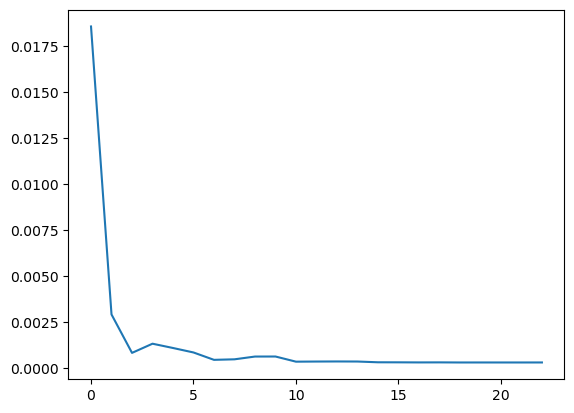

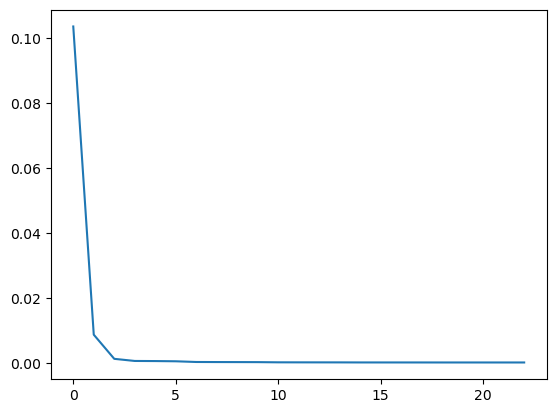

In [89]:
plt.plot(history.history['val_loss'])
# plt.plot(history.history['val_Customers_mse'])
# plt.plot(history.history['val_Sales_mse'])
plt.show()
plt.plot(history.history['loss'])
# plt.plot(history.history['Customers_mse'])
# plt.plot(history.history['Sales_mse'])

In [90]:
model.save('my_model_final.h5')

# Métrica

$$
\textrm{RMSE} = \sqrt{\frac{1}{n} \sum_{i=1}^{n} \left(\frac{\hat{y}_i - y_i}{y_i}\right)^2}
$$

In [91]:
model.load_weights('my_model_final.h5')
model.evaluate(X_val, y_val)

30188/30188 [==============================] - 9s 306us/sample - loss: 3.0955e-04 - Sales_loss: 1.2031e-04 - Customers_loss: 1.3011e-04 - Sales_mean_squared_error: 1.2020e-04 - Sales_rmspe: 0.0130 - Customers_mean_squared_error: 1.3010e-04 - Customers_rmspe: 0.0151


[0.0003095517851242864,
 0.00012031409,
 0.00013010863,
 0.000120199686,
 0.012993185,
 0.00013010259,
 0.015075239]

In [92]:
model.load_weights('bestmodel_f.hdf5')
model.evaluate(X_val, y_val)

30188/30188 [==============================] - 9s 306us/sample - loss: 3.0955e-04 - Sales_loss: 1.2031e-04 - Customers_loss: 1.3011e-04 - Sales_mean_squared_error: 1.2020e-04 - Sales_rmspe: 0.0130 - Customers_mean_squared_error: 1.3010e-04 - Customers_rmspe: 0.0151


[0.0003095517851242864,
 0.00012031409,
 0.00013010863,
 0.000120199686,
 0.012993185,
 0.00013010259,
 0.015075239]

In [151]:
# model.load_weights('bestmodel.hdf5')
# model.evaluate(X_val, y_val)
# 30188/30188 [==============================] - 5s 172us/step
# [0.12197033089921382,
#  0.07211007360268763,
#  0.037183713050426136,
#  0.07211007360268763,
#  0.037183713050426136]

# [0.12932546436786652,
#  0.07751645147800446,
#  0.039259567856788635,
#  0.07751645147800446,
#  0.039259567856788635]

In [93]:
if log_output:
    if add_customers:
        y_pred = np.exp(model.predict(X_val, verbose=1)[0][:, 0]*max_log_y[0])
        y_pred_test = np.exp(model.predict(X_test, verbose=1)[0][:, 0]*max_log_y[0])
    else:
        y_pred = np.exp(model.predict(X_val, verbose=1)*max_log_y)[:,0]
        y_pred_test = np.exp(model.predict(X_test, verbose=1)*max_log_y)[:,0]
else:
    if add_customers:
        y_pred = (model.predict(X_val, verbose=1)[0]*y_std[0] + y_mean[0])[:,0]
        y_pred_test = (model.predict(X_test, verbose=1)[0]*y_std[0] + y_mean[0])[:,0]
    else:
#         y_pred = model.predict(X_val, verbose=1)[:,0]*y_std + y_mean
#         y_pred_test = model.predict(X_test, verbose=1)[:,0]*y_std + y_mean
        y_pred = model.predict(X_val, verbose=1)[:,0]*y_max
        y_pred_test = model.predict(X_test, verbose=1)[:,0]*y_max
y_pred_test[df_test['Open'] == 0] = 0

41088/41088 [==============================] - 9s 228us/sample


In [96]:
# Resultado objetivo de la metricca: <0.129

In [94]:
np.sqrt((((df_val['Sales'].values - y_pred)/df_val['Sales'].values)**2).sum()/len(y_pred))

0.12122549449127981

In [95]:
y_pred_test[:10]

array([4249.315 , 6575.6025, 9139.773 , 6237.2314, 7104.676 , 5553.9727,
       7872.984 , 7494.47  , 4487.444 , 5558.3755], dtype=float32)

# Baseline

In [97]:
import pandas as pd
sample_csv = pd.read_csv('dataset/rossmann/sample_submission.csv')

In [98]:
stores_mean = {}
for store, g_df in df.groupby('Store'):
    stores_mean[store] = g_df[g_df['Sales'] > 0]['Sales'].mean()

In [99]:
df_test['Sales'] = df_test['Store'].apply(stores_mean.get)
df_test.loc[df_test['Open'] == 0, 'Sales'] = 0

In [100]:
df_test[['Store', 'Sales']].head(10)

,Store,Sales
0,0,4759.096031
1,2,6942.568678
2,6,8817.050891
3,7,5539.358418
4,8,6562.337612
5,9,5568.420918
6,10,8030.977041
7,11,7589.598214
8,12,5034.747182
9,13,5508.567394


In [101]:
df_test[df_test['Open'] == 0][['Store', 'Sales']].head()

,Store,Sales
543,702,0.0
676,878,0.0
840,1096,0.0
1399,702,0.0
1532,878,0.0


In [102]:
sample_csv['Sales'] = df_test['Sales']

In [103]:
sample_csv.to_csv(f'submision_baselinedout.csv', index=False)

In [104]:
sample_csv.head()

,Id,Sales
0,1,4759.096031
1,2,6942.568678
2,3,8817.050891
3,4,5539.358418
4,5,6562.337612


# Sumbit a la competición

In [105]:

sample_csv = pd.read_csv('dataset/rossmann/sample_submission.csv')
sample_csv['Sales'] = y_pred_test
sample_csv.head()

sample_csv.to_csv(f'submisionp_{add_customers}-{log_output}-{output_activation}-{l2_lambda}-{first_hidden_units}-{epochs}.csv', index=False)


# Analisis de embedings

In [134]:
def plot_embed(layer_name, cat_names):
    Y = model.get_layer(layer_name).get_weights()[0]
    print(Y.shape)
    plt.figure(figsize=(8,8))
    plt.scatter(-Y[:, 0], -Y[:, 1])
    for i, txt in enumerate(cat_names):
        plt.annotate(txt, (-Y[i, 0],-Y[i, 1]), xytext = (-5, 8), textcoords = 'offset points')

(7, 2)


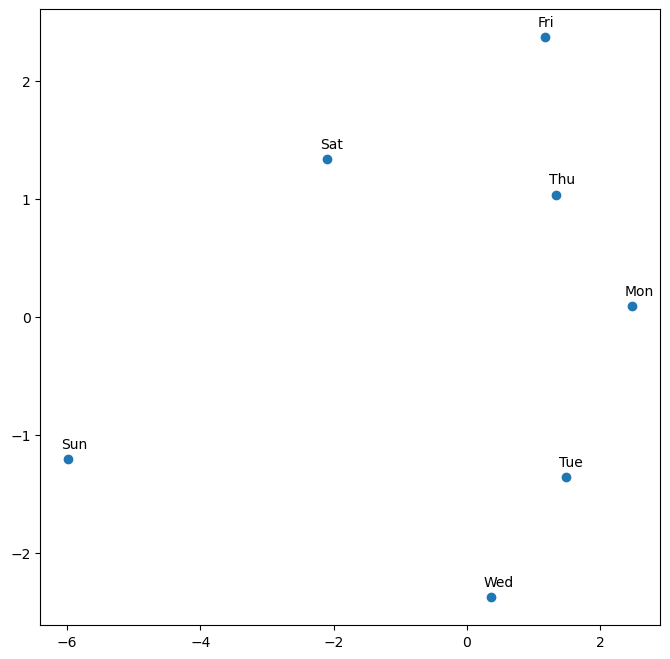

In [135]:
model.load_weights('my_model1p.hdf5')
plot_embed('DayOfWeek_Embed', ['Mon', 'Tue', 'Wed', 'Thu', 'Fri', 'Sat','Sun'])

(12, 2)


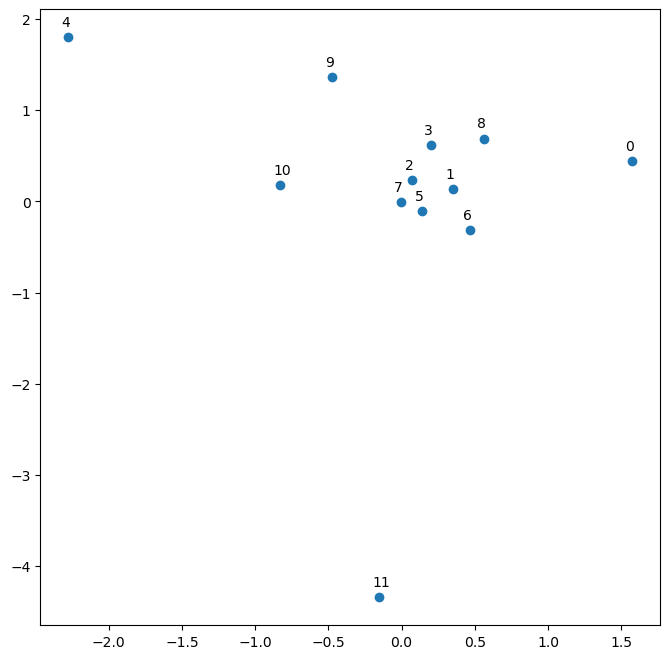

In [86]:
plot_embed('Month_Embed', list(range(12)))

In [87]:
from sklearn.manifold import TSNE
from sklearn.decomposition import PCA

In [100]:
#day_of_week_embedding.shape

In [136]:
tsne = TSNE(n_components=2, random_state=1, learning_rate=10, n_iter=10000)
Y = tsne.fit_transform(day_of_week_embedding)
names = ['Mon', 'Tue', 'Wed', 'Thu', 'Fri', 'Sat','Sun']
plt.figure(figsize=(8,8))
plt.scatter(-Y[:, 0], -Y[:, 1])
for i, txt in enumerate(names):
    plt.annotate(txt, (-Y[i, 0],-Y[i, 1]), xytext = (-5, 8), textcoords = 'offset points')

NameError: name 'TSNE' is not defined

In [91]:
cat_vars

['Store',
 'DayOfWeek',
 'Month',
 'Events',
 'Promo_fw',
 'Promo_bw',
 'StateHoliday_bool_fw',
 'StateHoliday_bool_bw',
 'SchoolHoliday_fw',
 'SchoolHoliday_bw']

## Store embeddings

In [ ]:
merged = Concatenate(name='All_Concatenate')(cat_vars_embed_outs + cont_vars_inputs)

In [395]:
cat_var_inputs# + cont_vars_inputs

[<tf.Tensor 'Store_input_6:0' shape=(?, 1) dtype=float32>,
 <tf.Tensor 'DayOfWeek_input_6:0' shape=(?, 1) dtype=float32>,
 <tf.Tensor 'Year_input:0' shape=(?, 1) dtype=float32>,
 <tf.Tensor 'Month_input_6:0' shape=(?, 1) dtype=float32>,
 <tf.Tensor 'Day_input:0' shape=(?, 1) dtype=float32>,
 <tf.Tensor 'StateHoliday_input:0' shape=(?, 1) dtype=float32>,
 <tf.Tensor 'StoreType_input:0' shape=(?, 1) dtype=float32>,
 <tf.Tensor 'Assortment_input:0' shape=(?, 1) dtype=float32>,
 <tf.Tensor 'Week_input:0' shape=(?, 1) dtype=float32>,
 <tf.Tensor 'Events_input_4:0' shape=(?, 1) dtype=float32>,
 <tf.Tensor 'Promo_fw_input_6:0' shape=(?, 1) dtype=float32>,
 <tf.Tensor 'CompetitionOpenSinceYear_input:0' shape=(?, 1) dtype=float32>]

In [396]:
submodel = Model(cat_var_inputs + cont_vars_inputs, merged)

In [397]:
submodel.summary()

Model: "model_12"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
Store_input (InputLayer)        [(None, 1)]          0                                            
__________________________________________________________________________________________________
DayOfWeek_input (InputLayer)    [(None, 1)]          0                                            
__________________________________________________________________________________________________
Year_input (InputLayer)         [(None, 1)]          0                                            
__________________________________________________________________________________________________
Month_input (InputLayer)        [(None, 1)]          0                                            
___________________________________________________________________________________________

In [398]:
submodel.save('embeddings_modelfound.hdf5')